# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_2.dropna().groupby('ESCMAE').median()

ORIGEM          0
CODESTAB      115
CODMUNNASC      0
LOCNASC         0
IDADEMAE        0
             ... 
munResUf        0
munResLat       1
munResLon       1
munResAlt       1
munResArea      1
Length: 69, dtype: int64

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [9]:
sinasc_1 = sinasc_raw[['IDADEPAI', 'IDADEMAE','munResNome']]
sinasc_1.dropna().groupby('munResNome').mean()

,IDADEPAI,IDADEMAE
munResNome,,
Alta Floresta D'Oeste,29.548701,25.892857
Alto Alegre dos Parecis,29.179104,24.679104
Alto Paraíso,28.833333,22.833333
Alvorada D'Oeste,30.757282,26.825243
Ariquemes,32.466667,28.133333
Buritis,30.812500,24.750000
Cabixi,34.333333,32.166667
Cacaulândia,36.333333,31.000000
Cacoal,30.931854,26.978605


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

<Axes: xlabel='ESCMAE'>

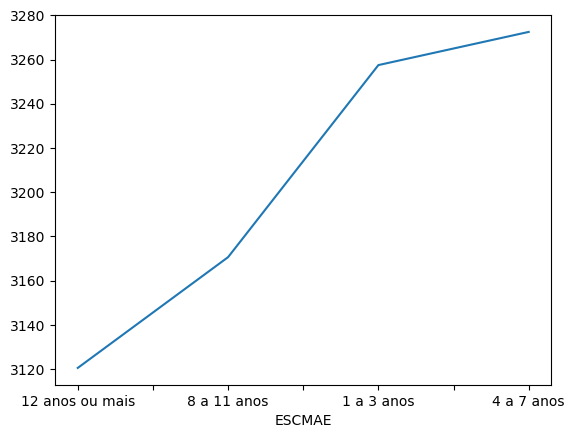

In [59]:
sinasc_2 = sinasc_raw[['DTNASC','PESO', 'ESCMAE']]
sinasc_2.head()
sinasc_2[sinasc_2['DTNASC'] == '2019-05-23'].groupby('ESCMAE')['PESO'].mean().sort_values().plot()
 

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [40]:
sinasc_1.groupby('munResNome')['IDADEMAE'].count().sort_values()[:2]

munResNome
Município ignorado - RO     1
Castanheiras               32
Name: IDADEMAE, dtype: int64

In [52]:
sinasc_1[sinasc_1['munResNome'] == 'Castanheiras'
        ].groupby('munResNome')['IDADEMAE','IDADEPAI'
        ].aggregate(['min', 'mean', 'max'])

C:\Users\Junha\AppData\Local\Temp\ipykernel_15836\1989367251.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc_1[sinasc_1['munResNome'] == 'Castanheiras'


IDADEMAE               IDADEPAI                 
                  min      mean max      min       mean   max
munResNome                                                   
Castanheiras       17  27.28125  39     17.0  30.392857  43.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [54]:
sinasc_1.groupby('munResNome')['IDADEMAE'].count().sort_values(ascending=False)[:1]

munResNome
Porto Velho    8437
Name: IDADEMAE, dtype: int64

In [55]:
sinasc_1[sinasc_1['munResNome'] == 'Porto Velho'
        ].groupby('munResNome')['IDADEMAE','IDADEPAI'
        ].aggregate(['min', 'mean', 'max'])

C:\Users\Junha\AppData\Local\Temp\ipykernel_15836\4263111630.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc_1[sinasc_1['munResNome'] == 'Porto Velho'


IDADEMAE               IDADEPAI                 
                 min      mean max      min       mean   max
munResNome                                                  
Porto Velho       12  26.31267  47     16.0  32.352679  65.0

In [82]:
65-47

18

<Axes: xlabel='RACACOR'>

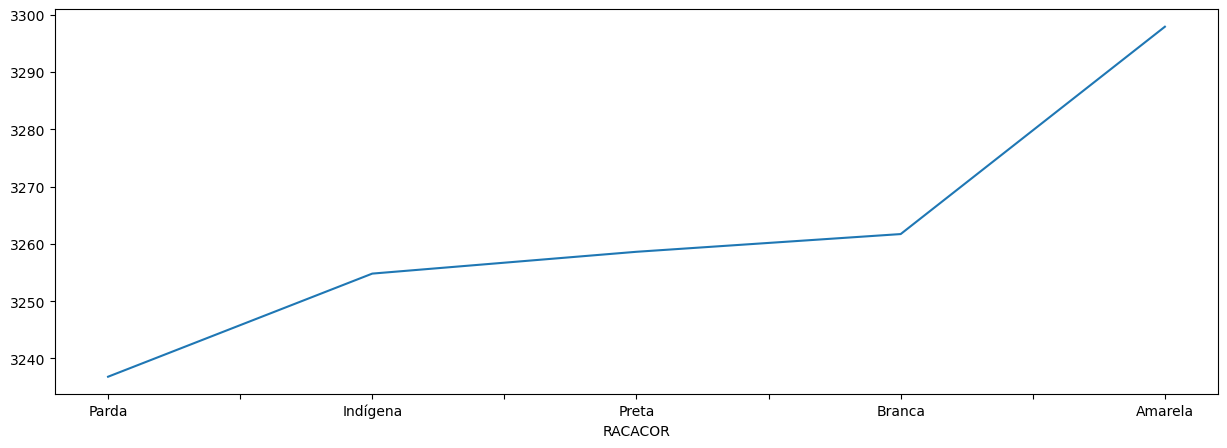

In [71]:
sinasc_raw.groupby(['RACACOR'])['PESO'].mean().sort_values().plot(figsize=[15,5])

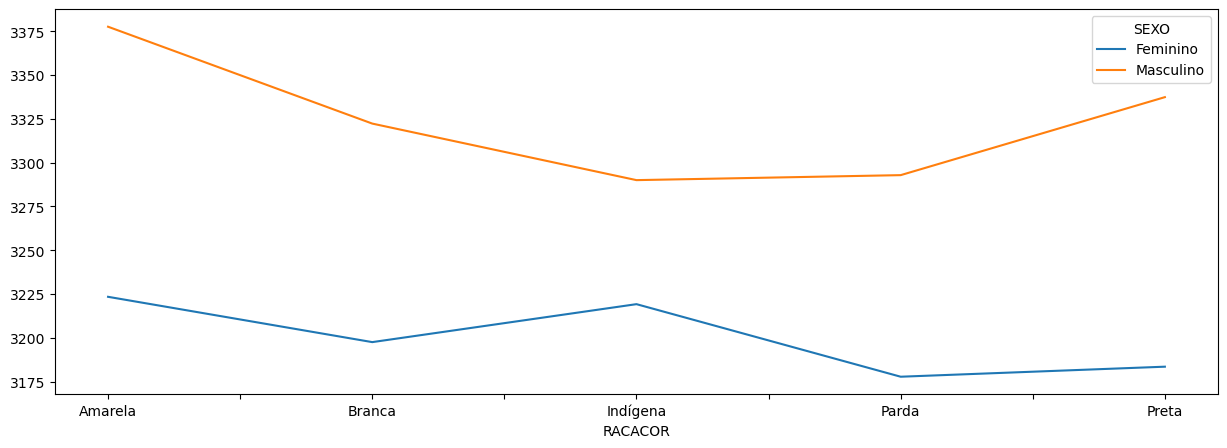

In [72]:
sinasc_raw.groupby(['RACACOR', 'SEXO'])['PESO'].mean().unstack().plot(figsize=[15,5]);

<Axes: xlabel='RACACOR'>

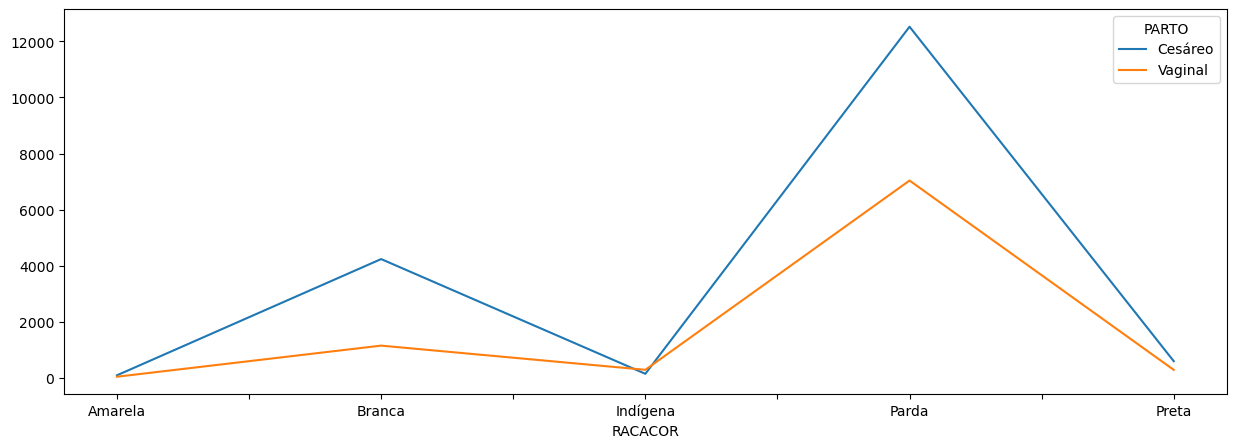

In [80]:
sinasc_raw.groupby(['RACACOR','PARTO'])['IDADEMAE'].count().unstack().plot(figsize=[15,5])

In [81]:
sinasc_raw.groupby(['RACACOR','PARTO'])['IDADEMAE'].count()

RACACOR   PARTO  
Amarela   Cesáreo       83
          Vaginal       33
Branca    Cesáreo     4232
          Vaginal     1143
Indígena  Cesáreo      137
          Vaginal      280
Parda     Cesáreo    12525
          Vaginal     7035
Preta     Cesáreo      587
          Vaginal      278
Name: IDADEMAE, dtype: int64

In [1]:
4232/1143

3.7025371828521436

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

1 - Na tabela de médias de idade por município é possível verificar que a idade dos pais é maior do que das mães.

2 -  Ao avaliar a base, as mães com mais tempo de estudo tiveram bebês com maior peso. No dia do meu aniversário, 23-05, esse padrão foi invertido. As mães com até 7 anos de estudo tiveram os bebês com maior peso.

3 - No município que nasceu menos bebês, Castanheiras, a diferença entre a idade mínima, média e máxima dos pais e mães é pequena. Ao contrário, no município que nasceu mais bebês, Porto Velho, essa diferença é bem maior (Ex: a idade máxima das mães é de 47 anos e a dos pais é de 65, uma amplitude de 18 anos).

Na análise extra, optei por avaliar o impacto da Raça nos bebês. No primeiro gráfio é possível verificar que os bebês de raça branca e amarela tem o maior peso. No segundo gráfico foi incluído o sexo para verificar se esse padrão teria alguma alteração e, no sexo feminino a raça indígena ultrapassa o peso dos bebês de raça branca.

Por último, foi avaliado o tipo de parto em comparação com o tipo de raça. O parto do tipo Cesáreo é realizado na maioria das raças, exceto pelo Indígena. Na raça Branca, a que mais realiza parto Cesáreo, a quantidade de partos desse tipo é 3,7 vezes maior.

In [6]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [7]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [4]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')